In [36]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.tree import plot_tree
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#Load dataset 
train_data = pd.read_csv('/Users/kritikansal/Desktop/SUBJECTS/CIS 508/TargetMarketing/train_data.csv')
test_data = pd.read_csv('/Users/kritikansal/Desktop/SUBJECTS/CIS 508/TargetMarketing/test_data.csv')

In [38]:
train_data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [39]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [40]:
train_data.nunique()

age            67
job            12
marital         3
education       4
default         2
balance      2353
housing         2
loan            2
contact         3
day            31
month          12
duration      875
campaign       32
pdays         292
previous       24
poutcome        4
y               2
dtype: int64

In [41]:
#No missing values 
train_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [42]:
#Calculating % of unknown values in each column 
unknown_percentages_column = (train_data == 'unknown').mean()*100

#Calculating % of unknown values in each row
unknown_percentages_row = (train_data == 'unknown').mean(axis = 1)*100

# Find the column with the highest percentage of 'unknown' values
column_with_highest_percentage = unknown_percentages_column.idxmax()
highest_percentage_column = unknown_percentages_column.max()

# Find the row with the highest percentage of 'unknown' values
row_with_highest_percentage = unknown_percentages_row.idxmax()
highest_percentage_row = unknown_percentages_row.max()

# Print the results
print("Percentage of 'unknown' values in each column:")
print(unknown_percentages_column)

print("\nColumn with the highest percentage of 'unknown' values:")
print(f"Column: {column_with_highest_percentage}, Percentage: {highest_percentage_column:.2f}%")
print("\nRow with the highest percentage of 'unknown' values:")
print(f"Row: {row_with_highest_percentage}, Percentage: {highest_percentage_row:.2f}%")

Percentage of 'unknown' values in each column:
age           0.000000
job           0.840522
marital       0.000000
education     4.136253
default       0.000000
balance       0.000000
housing       0.000000
loan          0.000000
contact      29.285556
day           0.000000
month         0.000000
duration      0.000000
campaign      0.000000
pdays         0.000000
previous      0.000000
poutcome     81.950896
y             0.000000
dtype: float64

Column with the highest percentage of 'unknown' values:
Column: poutcome, Percentage: 81.95%

Row with the highest percentage of 'unknown' values:
Row: 178, Percentage: 23.53%


In [43]:
#Drop the row 178 and poutcome feature
train_data = train_data.drop(columns=['poutcome'])
train_data = train_data.drop(178)

In [44]:
#Encoding 

train_data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,no


In [45]:
#One hot encoding for categorical columns 
train_data_encoded = pd.get_dummies(train_data, columns=['job', 'marital',  'contact', 'default', 'housing', 'loan'])

#Label encoding for ordinal categorical columns such as education, month
from sklearn.preprocessing import LabelEncoder

label_encoded = LabelEncoder()
train_data_encoded['y'] = label_encoded.fit_transform(train_data_encoded['y'])
train_data_encoded['month'] = label_encoded.fit_transform(train_data_encoded['month'])
train_data_encoded['education'] = label_encoded.fit_transform(train_data_encoded['education'])

In [46]:
train_data_encoded.tail()

,age,education,balance,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
4516,33,1,-333,30,5,329,5,-1,0,0,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,True,False,False,True,True,False
4517,57,2,-3313,9,8,153,1,-1,0,0,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True,False,True,False,True
4518,57,1,295,19,1,151,11,-1,0,0,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,True,False,True,False,True,False
4519,28,1,1137,6,3,129,4,211,3,0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,True,False,True,False
4520,44,2,1136,3,0,345,2,249,7,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,True,False,True


In [47]:
# Drop columns related to the 'unknown' category
unknown_columns = ['job_unknown', 'contact_unknown']

train_data_encoded.drop(unknown_columns, axis=1, inplace=True)

In [48]:
train_data_encoded.tail()

,age,education,balance,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
4516,33,1,-333,30,5,329,5,-1,0,0,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,True,False,False,True,True,False
4517,57,2,-3313,9,8,153,1,-1,0,0,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,True,False,True
4518,57,1,295,19,1,151,11,-1,0,0,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,True,False,True,False,True,False
4519,28,1,1137,6,3,129,4,211,3,0,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False,True,False
4520,44,2,1136,3,0,345,2,249,7,0,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,True,False,True


In [49]:
train_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4520 entries, 0 to 4520
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                4520 non-null   int64
 1   education          4520 non-null   int64
 2   balance            4520 non-null   int64
 3   day                4520 non-null   int64
 4   month              4520 non-null   int64
 5   duration           4520 non-null   int64
 6   campaign           4520 non-null   int64
 7   pdays              4520 non-null   int64
 8   previous           4520 non-null   int64
 9   y                  4520 non-null   int64
 10  job_admin.         4520 non-null   bool 
 11  job_blue-collar    4520 non-null   bool 
 12  job_entrepreneur   4520 non-null   bool 
 13  job_housemaid      4520 non-null   bool 
 14  job_management     4520 non-null   bool 
 15  job_retired        4520 non-null   bool 
 16  job_self-employed  4520 non-null   bool 
 17  job_services       

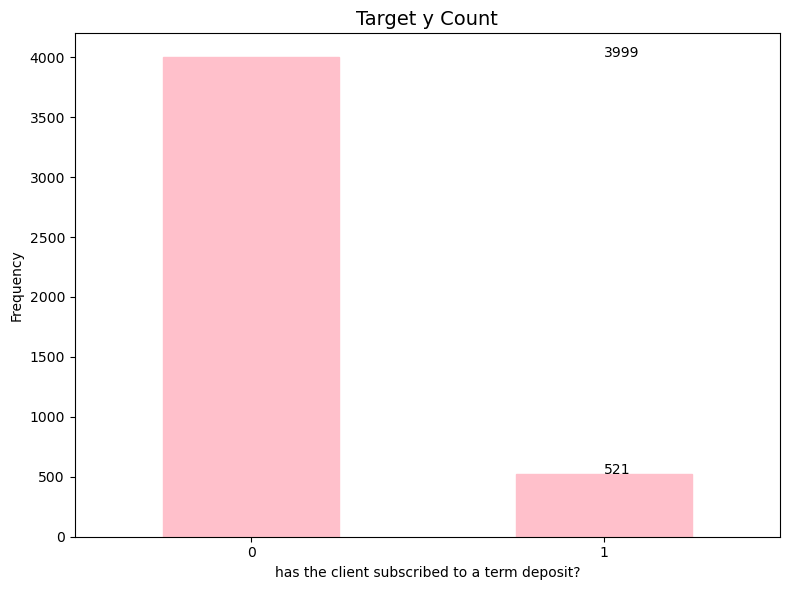

In [50]:
#Plotting bar chart of the 'target variable which is y'
plt.figure(figsize = (8,6))
v_count = train_data_encoded['y'].value_counts().sort_index()
bar = v_count.plot(kind = 'bar', color = 'pink', edgecolor = 'pink')

for i, count in enumerate(v_count):
    bar.text(x = 1, y = count, s = str(count))
    
plt.title('Target y Count', fontsize = 14, ha = 'center')
plt.xlabel('has the client subscribed to a term deposit?', fontsize = 10)
plt.ylabel('Frequency', fontsize = 10)
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()

#This shows that the dataset is imbalanced and count for unsatisified customer is much lower than satisfied customer

In [53]:
#Splitting data

X = train_data_encoded.drop(columns=['y'])
y = train_data_encoded['y']

In [55]:
from imblearn.under_sampling import RandomUnderSampler
#Under-sampling the majority from an imbalanced dataset
rus = RandomUnderSampler(random_state=42)

#Perform undersampling
X_resampled, y_resampled = rus.fit_resample(X, y)

# Create a balanced DataFrame
balanced_df = pd.concat([X_resampled, y_resampled], axis=1)

# Shuffle the dataset if needed
balanced_df = balanced_df.sample(frac=1, random_state=43).reset_index(drop=True)

In [56]:
balanced_df.shape #This makes a dataframe with equal number of instances of satisfied and unsatisfied customers

(1042, 32)

In [58]:
X_balanced = balanced_df.drop('y', axis = 1)
y_balanced = balanced_df['y']

In [59]:
#Split data into training and validation set 
X_balanced_train, X_balanced_val, y_balanced_train, y_balanced_val = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [74]:
#Preparing test data set 
test_data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [76]:
#Drop poutcome feature
test_data = test_data.drop(columns=['poutcome'])

In [78]:
#One hot encoding for categorical columns 
test_data_encoded = pd.get_dummies(test_data, columns=['job', 'marital',  'contact', 'default', 'housing', 'loan'])

#Label encoding for ordinal categorical columns such as education, month

test_label_encoded = LabelEncoder()
test_data_encoded['y'] = test_label_encoded.fit_transform(test_data_encoded['y'])
test_data_encoded['month'] = test_label_encoded.fit_transform(test_data_encoded['month'])
test_data_encoded['education'] = test_label_encoded.fit_transform(test_data_encoded['education'])

In [79]:
test_data_encoded.tail()

,age,education,balance,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
45206,51,2,825,17,9,977,3,-1,0,1,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,True,False,True,False,True,False
45207,71,0,1729,17,9,456,2,-1,0,1,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False,True,False,True,False
45208,72,1,5715,17,9,1127,5,184,3,1,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,True,False,True,False,True,False
45209,57,1,668,17,9,508,4,-1,0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,True,False,True,False
45210,37,1,2971,17,9,361,2,188,11,0,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,True,False,True,False


In [80]:
# Drop columns related to the 'unknown' category
unknown_columns = ['job_unknown', 'contact_unknown']

test_data_encoded.drop(unknown_columns, axis=1, inplace=True)

In [82]:
test_data_encoded.tail()

,age,education,balance,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
45206,51,2,825,17,9,977,3,-1,0,1,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,True,False,True,False,True,False
45207,71,0,1729,17,9,456,2,-1,0,1,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,True,False,True,False,True,False
45208,72,1,5715,17,9,1127,5,184,3,1,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,True,False,True,False,True,False
45209,57,1,668,17,9,508,4,-1,0,0,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,True,False,True,False
45210,37,1,2971,17,9,361,2,188,11,0,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False,True,False


In [83]:
#Seprate test data 
X_test = test_data_encoded.drop('y', axis = 1)
y_test = test_data_encoded['y']

In [84]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_balanced_train,y_balanced_train)

RandomForestClassifier(random_state=42)

In [85]:
#Model Evaluation on Validation Data set 
y_pred = rf.predict(X_balanced_val)
accuracy = accuracy_score(y_balanced_val, y_pred)
roc_auc = roc_auc_score(y_balanced_val, rf.predict_proba(X_balanced_val)[:,1])

print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc)
print(classification_report(y_balanced_val, y_pred))

Accuracy: 0.8229665071770335
ROC AUC: 0.9088154269972452
              precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.83      0.83      0.83       110

    accuracy                           0.82       209
   macro avg       0.82      0.82      0.82       209
weighted avg       0.82      0.82      0.82       209



In [86]:
#Confusion matrix for validation data set 
print("\nConfusion Matrix for Test Set:")
print(confusion_matrix(y_balanced_val, y_pred))


Confusion Matrix for Test Set:
[[81 18]
 [19 91]]


In [92]:
#Model Evaluation on TEST Data set before hyperparameter tuning
y_pred_test = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])

print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc)
print(classification_report(y_test, y_pred_test))

Accuracy: 0.8198226095419257
ROC AUC: 0.8994803219463812
              precision    recall  f1-score   support

           0       0.97      0.82      0.89     39922
           1       0.38      0.83      0.52      5289

    accuracy                           0.82     45211
   macro avg       0.68      0.82      0.70     45211
weighted avg       0.90      0.82      0.85     45211



In [93]:
#Using randomsearchCV for hyperparameter tuning
#Creating dictionary of parameters
rand_parameters={'min_samples_leaf' : range(2,100,5),
                 'max_depth': [None] + list(range(1, 20, 1)),
                 'n_estimators':[40, 50, 100, 150, 200, 300],
                 'min_samples_split': range(1,30,1),
                }

rf_search = RandomizedSearchCV(rf,rand_parameters,cv=5)
rf_search.fit(X_balanced_train, y_balanced_train)

#Best parameters
best_params_=rf_search.best_params_
print(best_params_)

{'n_estimators': 300, 'min_samples_split': 16, 'min_samples_leaf': 32, 'max_depth': 4}


In [94]:
rf2 = RandomForestClassifier(**best_params_)
rf2.fit(X_balanced_train, y_balanced_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=32, min_samples_split=16,
                       n_estimators=300)

In [109]:
#Model Evaluation on Validation Data set 
y_pred2 = rf2.predict(X_balanced_val)
accuracy = accuracy_score(y_balanced_val, y_pred2)
roc_auc = roc_auc_score(y_balanced_val, rf2.predict_proba(X_balanced_val)[:,1])

print("Accuracy after hypertuning:", accuracy)
print("ROC AUC after hyper tuning:", roc_auc)
print('\n')
print("=== Classification Report after hypertuning ===")
print(classification_report(y_balanced_val, y_pred2))

Accuracy after hypertuning: 0.8229665071770335
ROC AUC after hyper tuning: 0.882552800734619


=== Classification Report after hypertuning ===
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.85      0.81      0.83       110

    accuracy                           0.82       209
   macro avg       0.82      0.82      0.82       209
weighted avg       0.82      0.82      0.82       209



In [110]:
#Model Evaluation on TEST Data set after hyperparameter tuning
y_pred2_test = rf2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2_test)
roc_auc = roc_auc_score(y_test, rf2.predict_proba(X_test)[:,1])

print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc)
print(classification_report(y_test, y_pred2_test))

Accuracy: 0.7821105483178873
ROC AUC: 0.8631900484447224
              precision    recall  f1-score   support

           0       0.97      0.78      0.86     39922
           1       0.32      0.80      0.46      5289

    accuracy                           0.78     45211
   macro avg       0.65      0.79      0.66     45211
weighted avg       0.89      0.78      0.82     45211



Decision Tree

In [103]:
from sklearn.tree import DecisionTreeClassifier
rf3 = DecisionTreeClassifier(random_state = 42)
rf3.fit(X_balanced_train, y_balanced_train)

DecisionTreeClassifier(random_state=42)

In [104]:
#Model Evaluation on Validation Data set 
y_pred3 = rf3.predict(X_balanced_val)
accuracy = accuracy_score(y_balanced_val, y_pred3)
roc_auc = roc_auc_score(y_balanced_val, rf3.predict_proba(X_balanced_val)[:,1])

print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc)
print(classification_report(y_balanced_val, y_pred3))

Accuracy: 0.7894736842105263
ROC AUC: 0.7893939393939394
              precision    recall  f1-score   support

           0       0.77      0.79      0.78        99
           1       0.81      0.79      0.80       110

    accuracy                           0.79       209
   macro avg       0.79      0.79      0.79       209
weighted avg       0.79      0.79      0.79       209



In [105]:
#Model Evaluation on TEST Data set before hyperparameter tuning
y_pred_test3 = rf3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_test3)
roc_auc = roc_auc_score(y_test, rf3.predict_proba(X_test)[:,1])

print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc)
print(classification_report(y_test, y_pred_test3))

Accuracy: 0.7571387494193891
ROC AUC: 0.7579993077633925
              precision    recall  f1-score   support

           0       0.96      0.76      0.85     39922
           1       0.29      0.76      0.42      5289

    accuracy                           0.76     45211
   macro avg       0.63      0.76      0.63     45211
weighted avg       0.88      0.76      0.80     45211



In [107]:
#Using GridsearchCV for hyperparameter tuning
#Creating dictionary of parameters
param_grid={ 'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10],
            'criterion': ['gini', 'entropy']
                }

grid_search = GridSearchCV(rf3,param_grid,cv=5)
grid_search.fit(X_balanced_train, y_balanced_train)

#Best parameters
best_params_grid=grid_search.best_params_
print(best_params_grid)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}


In [108]:
rf4 = DecisionTreeClassifier(**best_params_grid)
rf4.fit(X_balanced_train, y_balanced_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=10)

In [111]:
#Model Evaluation on Validation Data set 
y_pred4 = rf4.predict(X_balanced_val)
accuracy = accuracy_score(y_balanced_val, y_pred4)
roc_auc = roc_auc_score(y_balanced_val, rf4.predict_proba(X_balanced_val)[:,1])

print("Accuracy after hypertuning:", accuracy)
print("ROC AUC after hyper tuning:", roc_auc)
print('\n')
print("=== Classification Report after hypertuning ===")
print(classification_report(y_balanced_val, y_pred4))

Accuracy after hypertuning: 0.7607655502392344
ROC AUC after hyper tuning: 0.833425160697888


=== Classification Report after hypertuning ===
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        99
           1       0.81      0.72      0.76       110

    accuracy                           0.76       209
   macro avg       0.76      0.76      0.76       209
weighted avg       0.77      0.76      0.76       209



In [112]:
#Model Evaluation on TEST Data set after hyperparameter tuning
y_pred_test4 = rf4.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_test4)
roc_auc = roc_auc_score(y_test, rf4.predict_proba(X_test)[:,1])

print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc)
print(classification_report(y_test, y_pred_test4))

Accuracy: 0.7883258499037845
ROC AUC: 0.8199815007955246
              precision    recall  f1-score   support

           0       0.95      0.80      0.87     39922
           1       0.32      0.70      0.43      5289

    accuracy                           0.79     45211
   macro avg       0.63      0.75      0.65     45211
weighted avg       0.88      0.79      0.82     45211

